In [114]:
import random
import copy
import imageio
import time
import numpy as np

def create_canvas(height, width):
    '''creates the canvas on which game of life will be played'''
    game = []
    
    for line in range(height):
        filled_line = []
        filled_line_uint8 = []
        for position in range(width):
            filled_line.append(random.randint(0, 1))
        game.append(filled_line)
    
    return game

In [85]:
def cor(pos):
    '''corrects position within a line in case it is out of range'''
    if pos < 0:
        return 0
    if pos > width:
        return width
    return pos


def check_line(line):
    '''returns IndexError if a line is -1. reason: it doesn't exist, \
    but python will evaluate the last line (line[-1])'''
    if line == -1:
        raise IndexError 
    return line


def check_position(game, line, pos):
    '''returns count of life around a given position (line and pos) \
    within a specified game of life (game)'''
    
    surrounding = sum(game[line][cor(pos-1):cor(pos+2)]) - game[line][pos]
    
    if not line == 0:
        try:
            surrounding += sum(game[check_line(line-1)][cor(pos-1):cor(pos+2)])
        except IndexError:
            pass
        
    try:
        surrounding += sum(game[line+1][cor(pos-1):cor(pos+2)])
    except IndexError:
        pass
    
    return surrounding


def alive_or_dead(this_round, line, pos):
    '''evaluates whether a cell should be alive or dead in the next round'''
    life_around = check_position(this_round, line, pos)
    
    if life_around == 3:
        return 1
    
    if life_around == 2:
        return this_round[line][pos]
    
    return 0

In [118]:
def scale_for_animation(frame, times_big):
    '''scales up single round and converts it to uint8 so it can be visualized'''
    converted_frame = []
    for line in frame:
        filled_line_uint8 = [255 if x == 1 else 0 for x in line]
        converted_frame.append(filled_line_uint8) 
    return np.kron(converted_frame, np.ones((times_big,times_big))).astype(np.uint8)


def create_visual(frames, fps):
    '''writes and saves gif of played game of life. uses imageio; ext can also be .mp4, which is much smaller'''
    ext = ".gif"
    name = str(int(time.time())) + ext
    writer = imageio.get_writer(name, fps=fps)
    
    for frame in frames:
        writer.append_data(frame)

    writer.close()
    
    print("Done. Saved game as {}; bye.".format(name))

In [104]:
def life_generator():
    '''generator that plays the game'''
    
    this_round = create_canvas(height, width)
    yield this_round
    
    while True:
        
        next_round = []
        
        for line in range(0, height):
            new_line = []
            
            for pos in range(0, width):
                new_pos = alive_or_dead(this_round, line, pos)
                new_line.append(new_pos)
               
            next_round.append(new_line)
        
        this_round = copy.deepcopy(next_round)
        yield next_round

In [119]:
# variables that can be adjusted:
rounds_to_play = 100
height = 50
width = 50

# static variables:
game_rounds = life_generator()
round_count = 1
visual = []

#play conway's game of life:
print("Let's play: Starting Game of Life with {} cells and {} rounds...".format(height * width, rounds_to_play))
for game_round in game_rounds:
    
    b = scale_for_animation(game_round, 4)
    visual.append(b)
    
    if round_count >= rounds_to_play:
        print("Finished game after {} rounds. Proceeding to creating image".format(round_count))
        create_visual(visual, 5)
        break
        
    round_count += 1

Let's play: Starting Game of Life with 2500 cells and 100 rounds...
Finished game after 100 rounds. Proceeding to creating image
Done. Saved game as 1544110298.gif; bye.


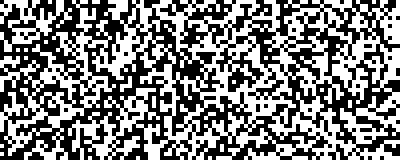

In [122]:
from IPython.display import Image
Image(filename='animation_examples/1544106535.gif')

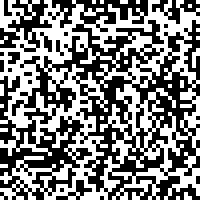

In [123]:
Image(filename='animation_examples/1544110298.gif')